# Exploring Refugee Data in Canada

# Table of Contents:

1. Introduction
2. Data
3. Exploratory Data Analysis (EDA)
4. Conclusion

# 1. Introduction

The project "Exploring Refugee Data in Canada" is primarily focused on a demographic analysis of refugees and asylum-seekers within Canada between 2012 and 2022. However, it recognizes that these demographic insights serve as a foundation for multidisciplinary analyses. The data can be instrumental in understanding political, demographic, socioeconomic, and human rights aspects. For example, it can inform policy decisions, shed light on demographic trends, and provide insights into their impact on the labor market, local economy, and education. 

# 2. Data: 

- **Year:** This variable represents the specific year of data collection or reporting. It serves as a time reference point for observing trends and changes in refugee and asylum-seeker data over time.


- **Country-of-origin:** This variable indicates the home country or nation from which refugees and asylum-seekers originate. It provides information about their geographic source, which is essential for understanding migration patterns and international displacement.


- **UNHCR Refugees:** This figure represents the number of individuals from the specified country of origin who have been officially recognized and registered as refugees by the United Nations High Commissioner for Refugees (UNHCR). These individuals have fled their home country due to persecution, conflict, or other humanitarian crises.


- **Asylum-seekers:** This variable denotes the number of individuals from the specified country of origin who have applied for asylum in Canada. Asylum-seekers seek protection and legal status in Canada, often because they fear persecution or harm in their home country.


- **Total Count:** The "Total Count" is a likely combination of "UNHCR Refugees" and "Asylum-seekers" figures. It provides an overall count of individuals from the country of origin who have either been recognized as refugees or have applied for asylum in Canada during the specified year. This variable offers a comprehensive view of the total displaced population from a particular country in that specific year.

**First I am going to import all the libraries that I will use in the project and open the dataset:**

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# 3. Exploratory Data Analysis (EDA)

In [2]:
# Read dataset
data = pd.read_csv('can-stats-2012-22.csv')
data.head()

,Year,Country-of-origin,UNHCR-refugees,Asylum-seekers,total-count
0,2012,Afghanistan,2609,411,3020
1,2012,Albania,1764,579,2343
2,2012,Algeria,513,284,797
3,2012,Angola,753,21,774
4,2012,Antigua and Barbuda,40,30,70


In [3]:
data.shape
print('The dataset has {} instances (rows) and {} features (columns).'.format(data.shape[0],data.shape[1]))

The dataset has 1870 instances (rows) and 5 features (columns).


**With the following code I want to identify if the dataset has null values. In addition, I want to identify the data types that the dataset has:**

In [4]:
# Check missing values
pd.DataFrame(data.isnull().sum(), columns=['Missing Values'])

,Missing Values
Year,0
Country-of-origin,0
UNHCR-refugees,0
Asylum-seekers,0
total-count,0


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1870 entries, 0 to 1869
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Year               1870 non-null   int64 
 1   Country-of-origin  1870 non-null   object
 2   UNHCR-refugees     1870 non-null   int64 
 3   Asylum-seekers     1870 non-null   int64 
 4   total-count        1870 non-null   int64 
dtypes: int64(4), object(1)
memory usage: 73.2+ KB


**The dataset has no null values, so I don't need to do the imputation. Also, the dataset has 4 integer data and 1 object data**.

In [6]:
# Check the main statistical data of the dataset
data.describe()

,Year,UNHCR-refugees,Asylum-seekers,total-count
count,1870.000000,1870.000000,1870.000000,1870.000000
mean,2016.955615,752.438503,323.139572,1075.578075
std,3.167123,2427.738942,1181.143362,2980.751399
min,2012.000000,0.000000,0.000000,0.000000
25%,2014.000000,20.000000,7.000000,39.250000
50%,2017.000000,124.000000,36.000000,187.000000
75%,2020.000000,563.750000,195.250000,889.750000
max,2022.000000,75098.000000,19765.000000,75294.000000


# As part of the Exploratory Analysis I would like to answer some questions such as:

- **Which countries have contributed the highest number of refugees admitted to Canada?**

In [7]:
# Create a DataFrame 
unhcr_refugees_top = data.groupby('Country-of-origin')['UNHCR-refugees'].sum().reset_index(name='UNHCR-refugees').sort_values(by='UNHCR-refugees', ascending=False).head(10)

# Show the dataframe
unhcr_refugees_top.reset_index(drop=True).style.bar(cmap='cool_r')

,Country-of-origin,UNHCR-refugees
0,Colombia,108416
1,China,98586
2,Ukraine,88376
3,Pakistan,74737
4,Haiti,70956
5,Sri Lanka,66343
6,Nigeria,60554
7,Mexico,51072
8,Türkiye,42533
9,Iran (Islamic Rep. of),40881


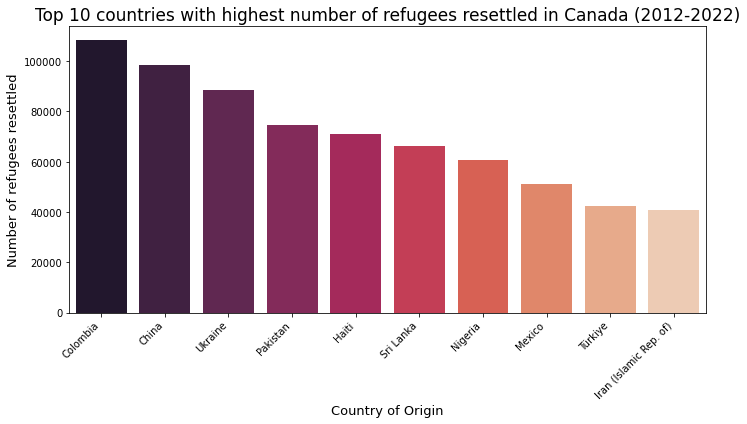

In [8]:
# Create Seaborn bar graph
plt.figure(figsize=(10,6))
sns.barplot(data=unhcr_refugees_top, x='Country-of-origin', y='UNHCR-refugees', palette='rocket')

# Add labels and titles
plt.xlabel('Country of Origin', fontsize=13)
plt.ylabel('Number of refugees resettled', fontsize=13)
plt.title('Top 10 countries with highest number of refugees resettled in Canada (2012-2022)', fontsize=17)

# Rotate x-axis labels
plt.xticks(rotation=45, ha='right')

# Display plot
plt.tight_layout()
plt.show()

The top 10 countries from which Canada has admitted the highest number of refugees include Colombia, China, Ukraine, Pakistan, Haiti, Sri Lanka, Nigeria, Mexico, Türkiye, and Iran. Colombia has the highest number of admitted refugees.

- **What is the annual aggregate of refugees resettled in Canada?**

In [9]:
# Create a DataFrame 
total_refugees_year = data.groupby('Year')['UNHCR-refugees'].sum().reset_index(name='UNHCR-refugees').sort_values(by='Year')

# Show the dataframe
total_refugees_year.reset_index(drop=True).style.bar(subset=['UNHCR-refugees'], cmap='cool_r')

,Year,UNHCR-refugees
0,2012,163751
1,2013,160347
2,2014,149164
3,2015,135890
4,2016,97322
5,2017,104768
6,2018,114101
7,2019,101757
8,2020,109214
9,2021,130125


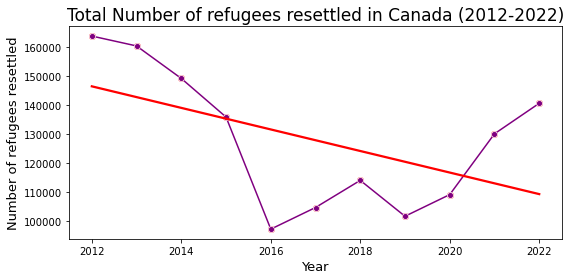

In [10]:
# Create a Seaborn line chart with trendline 
plt.figure(figsize=(8, 4))
sns.lineplot(data=total_refugees_year, x='Year', y='UNHCR-refugees', marker='o',color='purple')
sns.regplot(data=total_refugees_year, x='Year', y='UNHCR-refugees', ci=None, color='red')

# Add labels and title
plt.xlabel('Year', fontsize=13)
plt.ylabel('Number of refugees resettled', fontsize=13)
plt.title('Total Number of refugees resettled in Canada (2012-2022)', fontsize=17)

# Display plot
plt.tight_layout()
plt.show()

The number of refugees resettled in Canada has shown variations over the years. The highest number of refugees was admitted in 2012, with a decreasing trend until 2016. Afterward, there was an increase in the number of refugees admitted, with 2022 having the highest number.

- **Countries of Origin for Primary Asylum Claims in Canada**

In [11]:
# Create a DataFrame 
asylum_seekers_top = data.groupby('Country-of-origin')['Asylum-seekers'].sum().reset_index(name='Asylum-seekers').sort_values(by='Asylum-seekers', ascending=False).head(10)

# Show the dataframe
asylum_seekers_top.reset_index(drop=True).style.bar(cmap='cool_r')

,Country-of-origin,Asylum-seekers
0,Unknown,56098
1,Nigeria,51620
2,India,48806
3,Mexico,47146
4,Haiti,40908
5,Colombia,30475
6,China,21526
7,Pakistan,19023
8,Türkiye,18166
9,Iran (Islamic Rep. of),15011


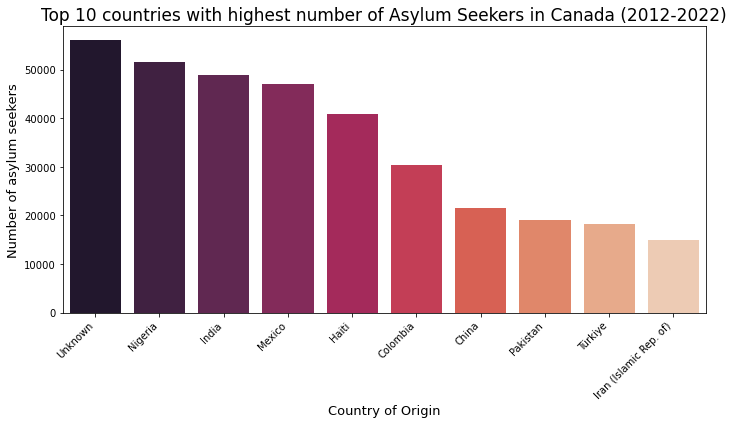

In [12]:
# Create Seaborn bar graph
plt.figure(figsize=(10,6))
sns.barplot(data=asylum_seekers_top, x='Country-of-origin', y='Asylum-seekers', palette='rocket')

# Add labels and title
plt.xlabel('Country of Origin', fontsize=13)
plt.ylabel('Number of asylum seekers', fontsize=13)
plt.title('Top 10 countries with highest number of Asylum Seekers in Canada (2012-2022)', fontsize=17)


# Rotate x-axis labels
plt.xticks(rotation=45, ha='right')

# Display plot
plt.tight_layout()
plt.show()

The top countries of asylum seekers in Canada are of unknown origin, Nigeria, India, Mexico, Haiti, Colombia, China, Pakistan, Turkey and Iran. Unknown origins are the most common asylum seekers.

- **What is the yearly total of asylum claims submitted in Canada?**

In [13]:
# Create a DataFrame 
asylum_seekers_year = data.groupby('Year')['Asylum-seekers'].sum().reset_index(name='Asylum-seekers').sort_values(by='Year')

# Show the dataframe
asylum_seekers_year.reset_index(drop=True).style.bar(subset=['Asylum-seekers'], cmap='cool_r')

,Year,Asylum-seekers
0,2012,32647
1,2013,22145
2,2014,16699
3,2015,19631
4,2016,23946
5,2017,51859
6,2018,78766
7,2019,97017
8,2020,85352
9,2021,63143


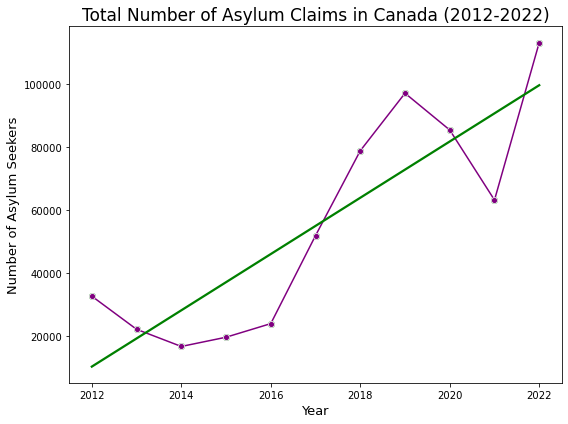

In [14]:
# Create a Seaborn line chart with trendline
plt.figure(figsize=(8, 6))
sns.lineplot(data=asylum_seekers_year, x='Year', y='Asylum-seekers',marker='o',color='purple')
sns.regplot(data=asylum_seekers_year, x='Year', y='Asylum-seekers', ci=None, color='green')

# Adding labels and title
plt.xlabel('Year', fontsize=13)
plt.ylabel('Number of Asylum Seekers', fontsize=13)
plt.title('Total Number of Asylum Claims in Canada (2012-2022)', fontsize=17)

# Display the plot
plt.tight_layout()
plt.show()

The number of asylum claims submitted in Canada has shown fluctuations over the years. 2022 had the highest number of asylum claims, while 2014 had the lowest. The numbers have been variable but generally increasing in recent years.

- **Can you outline the overarching patterns in refugee and asylum statistics during the period from 2012 to 2022?**

In [15]:
# Create a DataFrame 
countries_top = data.groupby('Country-of-origin')['total-count'].sum().reset_index(name='total-count').sort_values(by ='total-count', ascending=False).head(10)

# Show the dataframe
countries_top.reset_index(drop=True).style.bar(cmap='cool_r')

,Country-of-origin,total-count
0,Colombia,138891
1,China,120112
2,Nigeria,112174
3,Haiti,111864
4,Mexico,98218
5,Pakistan,93760
6,Ukraine,91182
7,India,81757
8,Sri Lanka,75102
9,Unknown,72545


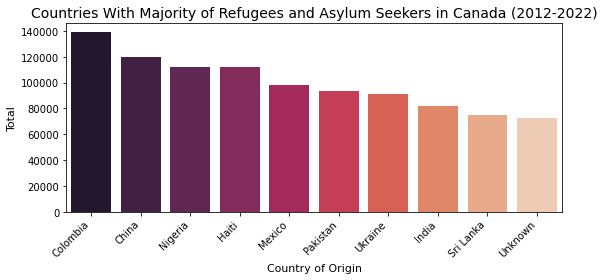

In [16]:
# Create bar graph
plt.figure(figsize=(8,4))
sns.barplot(data=countries_top, x='Country-of-origin', y='total-count', palette='rocket')

# Create labels and title
plt.xlabel('Country of Origin',fontsize=11)
plt.ylabel('Total',fontsize=11)
plt.title('Countries With Majority of Refugees and Asylum Seekers in Canada (2012-2022)',fontsize=14)

# Rotate x-axis labels
plt.xticks(rotation=45, ha='right')

# Display plot
plt.tight_layout()
plt.show()

Between 2012 and 2022, Canada has welcomed a substantial number of refugees and asylum seekers from a diverse range of countries. Notably, Colombia leads the way with 138,891 individuals seeking refuge, likely due to ongoing conflicts and human rights issues. China closely follows with 120,112 refugees, driven by political persecution and societal concerns. Nigeria is another significant contributor, with 112,174 individuals, influenced by conflicts and security worries. Various other countries, including Haiti, Mexico, Pakistan, Ukraine, India, and Sri Lanka, also play a substantial role in this migration pattern.

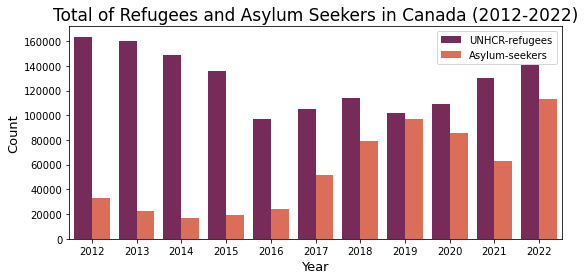

In [17]:
# General trends in number of refugees and asylum seekers

# Group the data by year and calculate the sum of each category per year
year_counts = data.groupby('Year')[['UNHCR-refugees', 'Asylum-seekers']].sum().reset_index()

# Pivot the data to create a suitable format for bar plotting
melted_data = pd.melt(year_counts, id_vars=['Year'], var_name='Category', value_name='Count')

# Create a bar graph with unstacked, side-by-side bars
plt.figure(figsize=(8, 4))
sns.barplot(data=melted_data, x='Year', y='Count', hue='Category', palette='rocket')

# Adding labels and title
plt.xlabel('Year',fontsize=13)
plt.ylabel('Count',fontsize=13)
plt.title('Total of Refugees and Asylum Seekers in Canada (2012-2022)',fontsize=17)

# Display the legend
plt.legend()

# Display the plot
plt.tight_layout()
plt.show()

- **Peak Refugee Admissions in 2012:** The year 2012 witnessed the highest number of refugees admitted to Canada during this period. It was followed by 2013 and 2014, indicating a peak in refugee admissions during those years.


- **Lowest Refugee Admissions in 2016:** In contrast, 2016 saw the lowest number of resettled refugees in Canada. This represents a notable drop in refugee admissions during that year.


- **Surge in Asylum Claims in 2022:** The year 2022 recorded the highest number of asylum claims made in Canada during the analyzed period. This was followed by 2019 and 2020, indicating a surge in individuals seeking asylum in these years.


- **Lowest Asylum Claims in 2014:** On the other hand, 2014 had the lowest number of asylum claims, followed by 2015 and 2013. This suggests a period of relatively fewer asylum claims during those years.

# 4. Conclusion

In conclusion, the project "Exploring Refugee Data in Canada" has provided valuable insights into the demographics and trends of refugees and asylum-seekers in Canada between 2012 and 2022. This analysis has significant implications, extending beyond demographics and offering a foundation for various multidisciplinary studies. The data not only informs demographic trends but also plays a crucial role in addressing political, socioeconomic, and human rights aspects. It can guide policy decisions, provide valuable information on labor market dynamics, and offer insights into the impacts on the local economy and education sector.

Through exploratory data analysis, we have observed several key findings:

- **Top Countries of Origin:** Colombia, China, and Nigeria are the leading countries of origin for refugees admitted to Canada. These individuals are often fleeing persecution, conflict, or humanitarian crises in their home countries.


- **Annual Refugee Admissions:** The number of refugees admitted to Canada has shown variations over the years. The highest admission was in 2012, with fluctuations in subsequent years. 2022 marked another peak in refugee admissions.


- **Primary Asylum Claims:** The top countries from which Canada receives asylum claims include those of unknown origin, Nigeria, India, Mexico, and Haiti. These claims highlight the need for international protection and safety.


- **Yearly Asylum Claims:** The number of asylum claims submitted in Canada has been variable, with a significant increase in 2022. The fluctuations in asylum claims indicate changing global circumstances.


- **General Trends:** The overarching patterns in refugee and asylum statistics reveal the highest admissions in 2012, followed by lower numbers in 2016. Asylum claims surged in 2022, while 2014 witnessed the lowest number.


This analysis provides valuable data for policymakers, researchers, and organizations working with refugees and asylum-seekers in Canada. It underscores the importance of adapting to changing migration trends and addressing the specific challenges presented in different years. Understanding these patterns is crucial for shaping policies, providing assistance, and ensuring the well-being of displaced populations in Canada.